In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_2.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 1.5
part_sd = 0.5

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

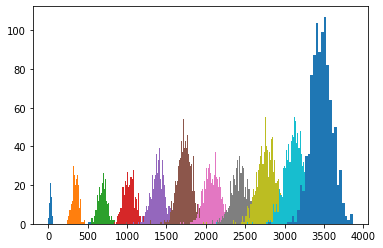

In [3]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [27]:
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

mus = {}
delta_mus = {}

In [28]:
def proc_calibration(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy[number]
    n, bins, patches = plt.hist(data[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    mus[en] = mu
    delta_mus[en] = delta_mu
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))

mu = 30.050850530105347 +- 0.4784480891229571
sigma = 11.632170840902626 +- 0.40824380454232695
nevents = 604.3816708920473 +- 23.92147364348184


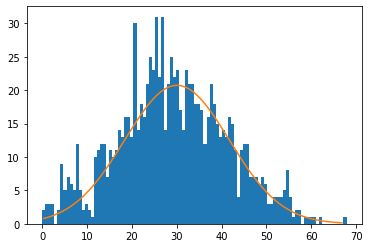

In [29]:
proc_calibration(0, 100, [30, 15, 10000])

mu = 343.0624854584695 +- 1.2035930279049463
sigma = 39.23545635322234 +- 0.9662135196089426
nevents = 2365.5299844494602 +- 70.05841523164246


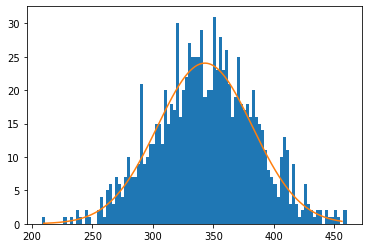

In [30]:
proc_calibration(1, 100, [350, 40, 10000])

mu = 692.592699017435 +- 1.8481771584897615
sigma = 54.30697592123376 +- 1.5343188703639115
nevents = 2992.7992461539243 +- 97.91368463311774


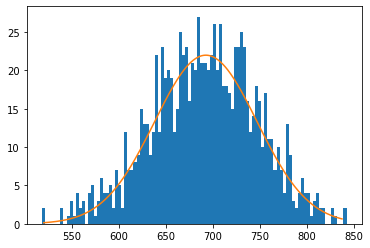

In [31]:
proc_calibration(2, 100, [700, 50, 10000])

mu = 1033.2547001343764 +- 2.565411644602892
sigma = 69.90213336642309 +- 2.026555472298809
nevents = 4268.230110142021 +- 151.1208015596798


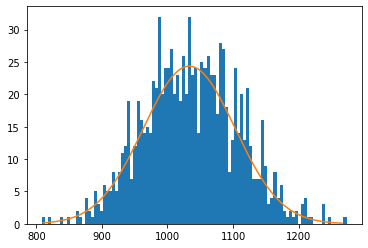

In [32]:
proc_calibration(3, 100, [1000, 50, 10000])

mu = 1387.8120372870196 +- 2.7714408839099205
sigma = 80.83627521265801 +- 2.247728456749334
nevents = 5650.752448416565 +- 187.78645590092387


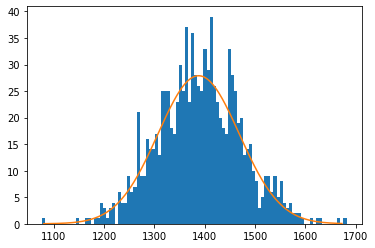

In [33]:
proc_calibration(4, 100, [1300, 80, 10000])

mu = 1735.4973519783168 +- 2.7096229230333924
sigma = 83.57478011232958 +- 2.0416504978767307
nevents = 9553.693186927187 +- 303.31345516490927


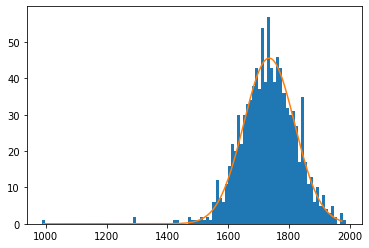

In [34]:
proc_calibration(5, 100, [1700, 100, 10000])

mu = 2085.5281611683113 +- 3.1489534595505293
sigma = 100.02084556911174 +- 2.4971161976233587
nevents = 6835.284778933189 +- 208.26497427724289


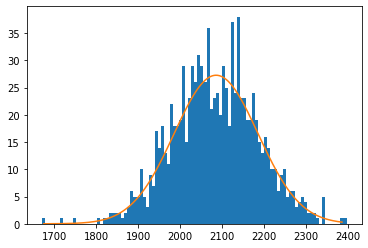

In [35]:
proc_calibration(6, 100, [2000, 100, 10000])

mu = 2428.072103805168 +- 3.1309638386070766
sigma = 101.67879519311425 +- 2.505289878612913
nevents = 6558.1457314704485 +- 196.13752795388802


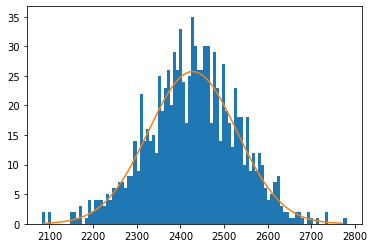

In [36]:
proc_calibration(7, 100, [2400, 100, 10000])

mu = 2773.1704937190625 +- 4.030770313050791
sigma = 116.01927683658474 +- 3.0562623290775925
nevents = 11442.973881543889 +- 390.5803357037842


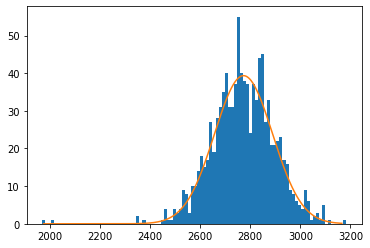

In [37]:
proc_calibration(8, 100, [2800, 100, 10000])

mu = 3125.7849871726785 +- 3.517274211769957
sigma = 114.20447859954685 +- 2.6723436572827506
nevents = 13697.06341269274 +- 415.18513284094536


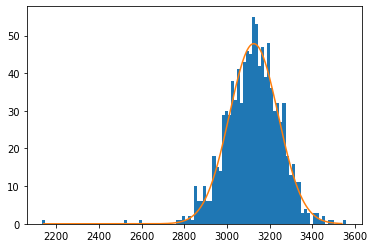

In [38]:
proc_calibration(9, 100, [3000, 100, 10000])

mu = 3469.1561535448077 +- 5.105545410636343
sigma = 124.25557764703754 +- 3.692070697641236
nevents = 32249.495260191463 +- 1305.903275605777


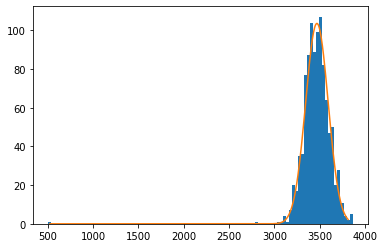

In [39]:
proc_calibration(10, 100, [3400, 120, 10000])

In [40]:
energy_mean= [mus[en] for en in energy]
energy_std = [delta_mus[en] for en in energy]

a = 0.3477027277757657 +- 0.0001984179852282978
b = -4.666603832981087 +- 0.45043962760488904


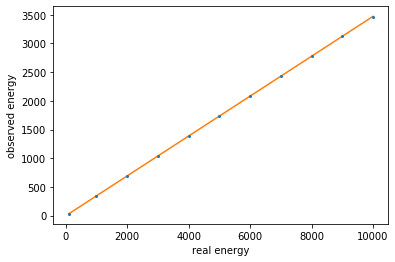

In [41]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [42]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [43]:
f = open("reduction_2.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [44]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]
sigmas = {}
delta_sigmas = {}

In [45]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 499.399850590571 +- 2.593339806481404
sigma = 82.80061692222964 +- 1.9132437366379547
nevents = 11283.506844276926 +- 348.53823690923787
mean = 499.3022990459304
std = 84.7879203083475




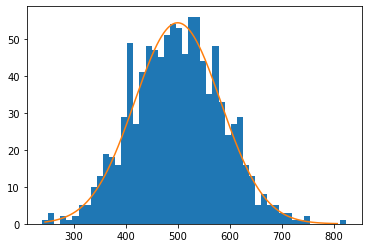

In [46]:
proc(0, 50, [500, 150, 10000])

mu = 1499.9984198385773 +- 4.402983544921634
sigma = 141.75477986464205 +- 3.4724684831540125
nevents = 17468.017009996915 +- 532.3046695368705
mean = 1501.9550834521233
std = 142.02582519378865




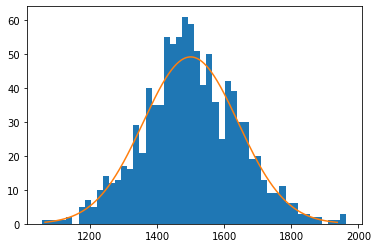

In [47]:
proc(1, 50, [1500, 200, 100000])

mu = 2512.6737274143406 +- 5.21041854405925
sigma = 174.22919364570913 +- 3.833470462350311
nevents = 27740.458412743406 +- 819.1470064655347
mean = 2508.5613496120936
std = 181.6718309651025




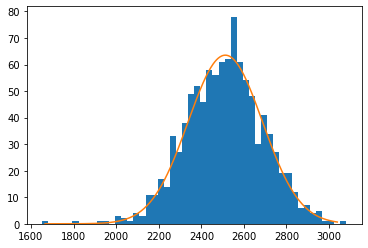

In [48]:
proc(2, 50, [2500, 300, 100000])

mu = 3507.889016412796 +- 8.098022132436379
sigma = 211.10164852873586 +- 5.980895741089158
nevents = 25553.82563738427 +- 963.8211262011959
mean = 3510.7158204413167
std = 218.85121276793276




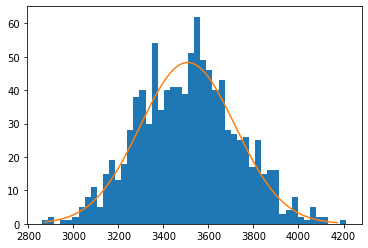

In [49]:
proc(3, 50, [3500, 400, 100000])

mu = 4493.384226626095 +- 9.926348578416674
sigma = 230.78605420763728 +- 7.605866633771183
nevents = 39051.874856557006 +- 1670.2522109364836
mean = 4493.981359158866
std = 245.0050306071669




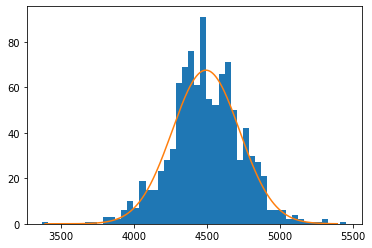

In [50]:
proc(4, 50, [4500, 500, 100000])

mu = 5507.480449845072 +- 10.5098523220353
sigma = 268.7247068741196 +- 7.9738969169994265
nevents = 66679.30421632847 +- 2573.9371530588273
mean = 5495.663764637754
std = 294.62985580246226




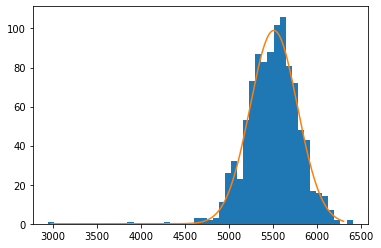

In [51]:
proc(5, 50, [5500, 500, 100000])

mu = 6500.761628318184 +- 9.756642272022408
sigma = 287.09804501043095 +- 7.19638353946875
nevents = 44846.23705118186 +- 1493.5250167003933
mean = 6504.002602422497
std = 302.0747806318221




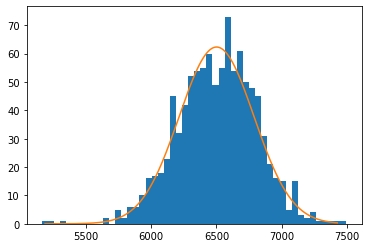

In [52]:
proc(6, 50, [6500, 500, 100000])

mu = 7485.188480334812 +- 7.220866535507667
sigma = 303.146436587848 +- 5.241486957183692
nevents = 42929.56086042784 +- 1007.5447998040094
mean = 7486.507837786401
std = 310.92562532972244




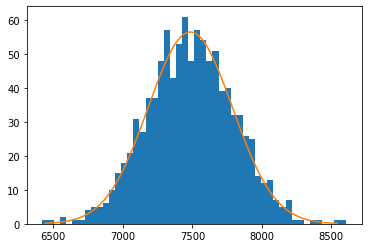

In [53]:
proc(7, 50, [7500, 600, 100000])

mu = 8511.324635749792 +- 11.007195364807618
sigma = 328.9338923759455 +- 8.457924956715216
nevents = 54036.6422888465 +- 1772.1976222193446
mean = 8504.88501818734
std = 348.6255089995217




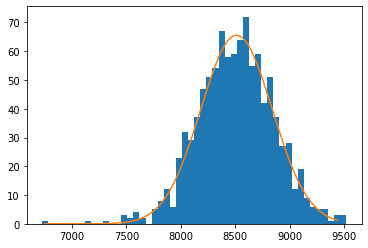

In [54]:
proc(8, 50, [8500, 500, 1000000])

mu = 9494.787526071372 +- 10.723458003587023
sigma = 373.0448011751068 +- 8.533467037373358
nevents = 48601.826420313824 +- 1352.6870794515908
mean = 9490.959216204883
std = 375.94796892625874




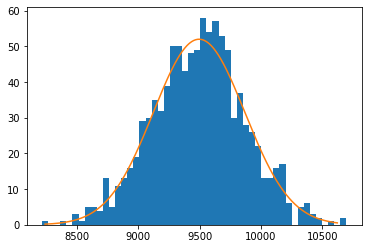

In [55]:
proc(9, 50, [9500, 700, 1000000])

In [56]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = -0.0003197605072079504 +- 0.0016149111845004584
b = 3.6084588088647913 +- 0.11635015265679385


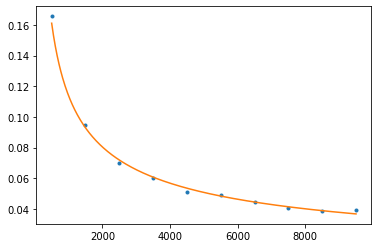

In [57]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [58]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()